#   Restaurant Food Cost

In [1]:
import pandas as pd


In [3]:
# Load train dataset
train_df = pd.read_excel("https://github.com/FlipRoboTechnologies/ML-Datasets/raw/main/Restaurant%20Food%20Cost/Data_Train.xlsx")

# Load test dataset
test_df = pd.read_excel("https://github.com/FlipRoboTechnologies/ML-Datasets/raw/main/Restaurant%20Food%20Cost/Data_Test.xlsx")


In [4]:
# Display first few rows of train dataset
print("Train Dataset Head:")
print(train_df.head())

# Display dataset information
print("\nTrain Dataset Information:")
print(train_df.info())

# Display dataset shape
print("\nTrain Dataset Shape:")
print(train_df.shape)

# Summary statistics of numerical columns
print("\nTrain Dataset Summary Statistics:")
print(train_df.describe())

# Check for missing values
print("\nTrain Dataset Missing Values:")
print(train_df.isnull().sum())


Train Dataset Head:
               TITLE  RESTAURANT_ID  \
0      CASUAL DINING           9438   
1  CASUAL DINING,BAR          13198   
2      CASUAL DINING          10915   
3        QUICK BITES           6346   
4     DESSERT PARLOR          15387   

                                     CUISINES  \
0                 Malwani, Goan, North Indian   
1              Asian, Modern Indian, Japanese   
2  North Indian, Chinese, Biryani, Hyderabadi   
3                            Tibetan, Chinese   
4                                    Desserts   

                                     TIME     CITY        LOCALITY RATING  \
0  11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)    Thane  Dombivali East    3.6   
1                    6pm – 11pm (Mon-Sun)  Chennai       Ramapuram    4.2   
2     11am – 3:30pm, 7pm – 11pm (Mon-Sun)  Chennai      Saligramam    3.8   
3                 11:30am – 1am (Mon-Sun)   Mumbai     Bandra West    4.1   
4                    11am – 1am (Mon-Sun)   Mumbai     Lower Pare

In [5]:
# Display first few rows of test dataset
print("Test Dataset Head:")
print(test_df.head())

# Display dataset information
print("\nTest Dataset Information:")
print(test_df.info())

# Display dataset shape
print("\nTest Dataset Shape:")
print(test_df.shape)

# Summary statistics of numerical columns
print("\nTest Dataset Summary Statistics:")
print(test_df.describe())

# Check for missing values
print("\nTest Dataset Missing Values:")
print(test_df.isnull().sum())


Test Dataset Head:
           TITLE  RESTAURANT_ID                                      CUISINES  \
0  CASUAL DINING           4085         North Indian, Chinese, Mughlai, Kebab   
1    QUICK BITES          12680  South Indian, Fast Food, Pizza, North Indian   
2  CASUAL DINING           1411       North Indian, Seafood, Biryani, Chinese   
3           None            204                                       Biryani   
4    QUICK BITES          13453                          South Indian, Kerala   

                                                TIME       CITY      LOCALITY  \
0                      12noon – 12midnight (Mon-Sun)      Noida     Sector 18   
1                            7am – 12:30AM (Mon-Sun)     Mumbai    Grant Road   
2                           11am – 11:30pm (Mon-Sun)     Mumbai  Marine Lines   
3  9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...  Faridabad           NIT   
4                              11am – 10pm (Mon-Sun)      Kochi        Kaloor   

  RATIN

In [6]:
# Handle missing values
train_df.dropna(inplace=True)  # Drop rows with missing values
# Convert categorical variables into numerical format
train_df = pd.get_dummies(train_df, columns=['TITLE', 'CUISINES', 'CITY', 'LOCALITY'])


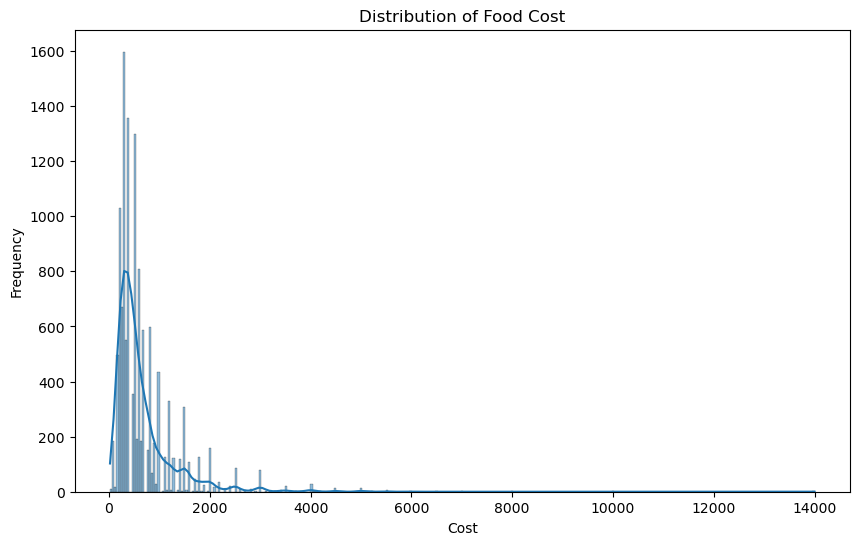

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset into train_df
train_df = pd.read_excel("https://github.com/FlipRoboTechnologies/ML-Datasets/raw/main/Restaurant%20Food%20Cost/Data_Train.xlsx")

# Visualize distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(train_df['COST'], kde=True)
plt.title('Distribution of Food Cost')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.show()


In [8]:
import pandas as pd

# Load the dataset into train_df
train_df = pd.read_excel("https://github.com/FlipRoboTechnologies/ML-Datasets/raw/main/Restaurant%20Food%20Cost/Data_Train.xlsx")

# Compute correlation matrix
correlation_matrix = train_df.corr(numeric_only=True)

# Select relevant features based on correlation with the target variable
selected_features = correlation_matrix['COST'].abs().sort_values(ascending=False).index[1:11]
selected_features_df = train_df[selected_features]

# Print the selected features
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['RESTAURANT_ID'], dtype='object')


In [5]:
X = train_df.drop(columns=['COST'])
y = train_df['COST']


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
import pandas as pd

# Load the dataset into train_df
train_df = pd.read_excel("https://github.com/FlipRoboTechnologies/ML-Datasets/raw/main/Restaurant%20Food%20Cost/Data_Train.xlsx")


In [5]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X = train_df.drop(columns=['COST'])
y = train_df['COST']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Load the test dataset
test_df = pd.read_excel("https://github.com/FlipRoboTechnologies/ML-Datasets/raw/main/Restaurant%20Food%20Cost/Data_Test.xlsx")

# Drop non-numeric columns from X_train and X_test
X_train_numeric = X_train.select_dtypes(include=['number'])
X_test_numeric = X_test.select_dtypes(include=['number'])

# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_numeric, y_train)

# Model evaluation
y_pred = model.predict(X_test_numeric)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

# Prediction generation
test_df_numeric = test_df.select_dtypes(include=['number'])
predictions = model.predict(test_df_numeric)

# Optionally, you can save the predictions to a file or use them for further analysis


Mean Squared Error: 429600.6981627684
Mean Absolute Error: 389.81043084026123
R-squared: -0.19366727010709006


In [10]:
# Create a DataFrame to store the predictions
predictions_df = pd.DataFrame(predictions, columns=['Predicted_COST'])

# Optionally, you can concatenate the predictions DataFrame with the original test DataFrame
result_df = pd.concat([test_df, predictions_df], axis=1)

# Save the result DataFrame to a CSV file
result_df.to_csv('predicted_costs.csv', index=False)

# Optionally, you can print the first few rows of the result DataFrame to see the predictions
print(result_df.head())


           TITLE  RESTAURANT_ID                                      CUISINES  \
0  CASUAL DINING           4085         North Indian, Chinese, Mughlai, Kebab   
1    QUICK BITES          12680  South Indian, Fast Food, Pizza, North Indian   
2  CASUAL DINING           1411       North Indian, Seafood, Biryani, Chinese   
3           None            204                                       Biryani   
4    QUICK BITES          13453                          South Indian, Kerala   

                                                TIME       CITY      LOCALITY  \
0                      12noon – 12midnight (Mon-Sun)      Noida     Sector 18   
1                            7am – 12:30AM (Mon-Sun)     Mumbai    Grant Road   
2                           11am – 11:30pm (Mon-Sun)     Mumbai  Marine Lines   
3  9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...  Faridabad           NIT   
4                              11am – 10pm (Mon-Sun)      Kochi        Kaloor   

  RATING       VOTES  Pred

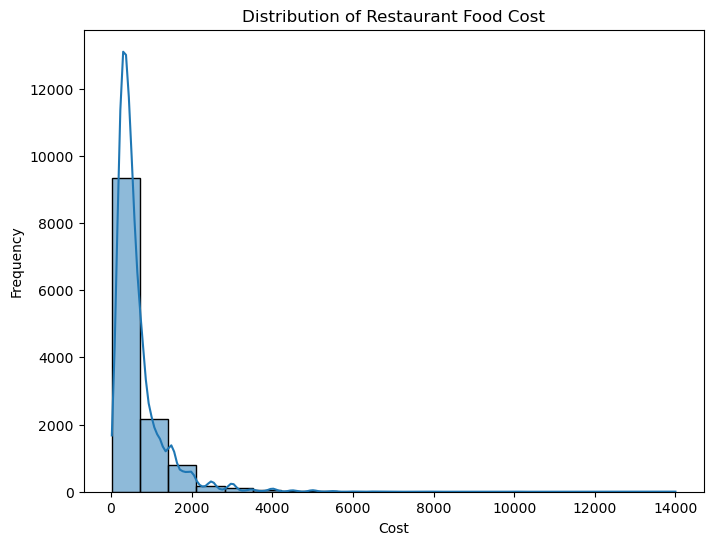

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(train_df['COST'], bins=20, kde=True)
plt.title('Distribution of Restaurant Food Cost')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.show()


In [12]:
train_df['CUISINE_COUNT'] = train_df['CUISINES'].apply(lambda x: len(x.split(',')))
